In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [82]:
!pip install augraphy


In [83]:
from PIL import Image, ImageEnhance
import cv2
import augraphy
from google.colab.patches import cv2_imshow

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
def box(image, row, size):
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(image)
    f = open('/content/drive/MyDrive/Hackathon-6/liver-ultrasound-detection/train/train/sample_train/annotations/' + row +'.txt', "r")
    text = f.readlines()
    print(size)
    for i in text:
        t = i.replace('\n', "")
        data = t.split(' ')
        data = [float(d) for d in data]
        w = data[3] * size[0]
        h = data[4] * size[1]
        data[1] = data[1] * size[0] - (float(w/2))
        data[2] = data[2] * size[1] - (float(h/2))
        data[3] = w
        data[4] = h

        rect = patches.Rectangle((int(data[1]),int( data[2] ) ), int(data[3]), int(data[4]), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

(810, 1080, 3)
(1080, 810)


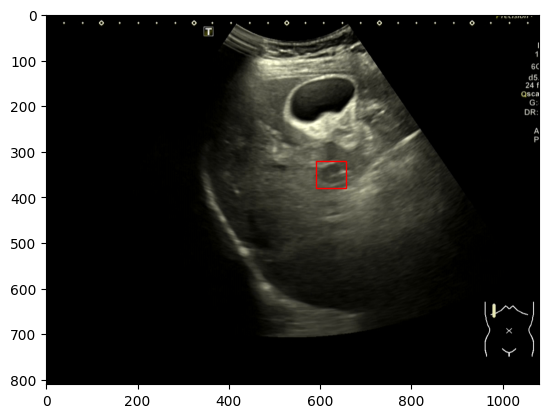

In [148]:
row = "4771"
img = cv2.imread('/content/drive/MyDrive/Hackathon-6/liver-ultrasound-detection/train/train/sample_train/images/' + row +'.jpg')
print(img.shape)
temp = img[:,:,1]
img[:,:,1] = img[:,:,0]
img[:,:,0] = temp

# fig, ax = plt.subplots()
# ax.imshow(img)
# plt.show()
k = img.shape
box(img,row,(k[1],k[0]))

(4032, 3024)


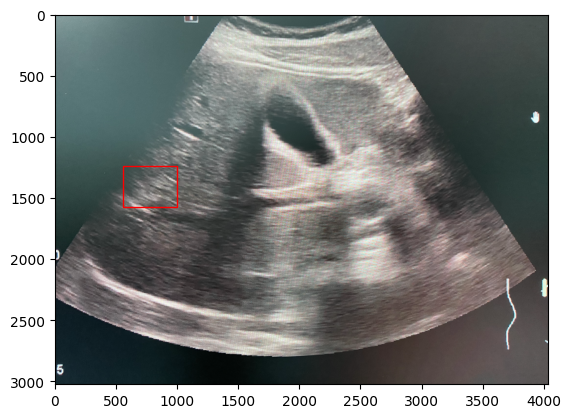

In [147]:
row = "393"
K = cv2.imread('/content/drive/MyDrive/Hackathon-6/liver-ultrasound-detection/train/train/sample_train/images/' + row +'.jpg')
box(img,row,(K.shape[1],K.shape[0]))

(1080, 810)


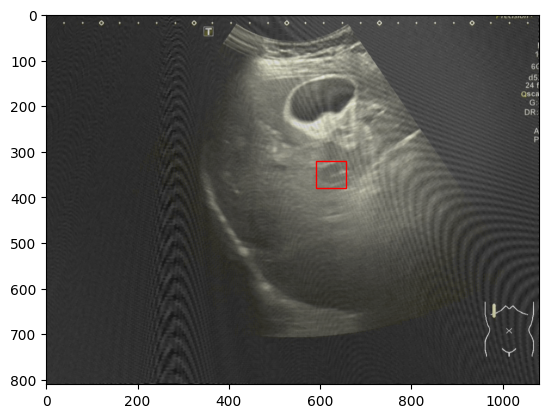

In [212]:
from augraphy import *
import random

brightness_brighten= Brightness(brightness_range=(15, 17),
                       min_brightness=0,
                    )
moire = Moire(moire_density = (15,20),
              moire_blend_method = "normal",
              moire_blend_alpha = 1,
             )
lighting_gradient_gaussian = LightingGradient(light_position=None,
                                              direction=random.random() * 360,
                                              max_brightness=150,
                                              min_brightness=0,
                                              mode="gaussian",
                                              transparency=0.9
                                              )

reflected_light = augmentations.reflectedlight.ReflectedLight(reflected_light_smoothness = 0.8,
                                 reflected_light_internal_radius_range=(0.0, 0.2),
                                 reflected_light_external_radius_range=(0.1, 0.9),
                                 reflected_light_minor_major_ratio_range = (0.9, 1.0),
                                 reflected_light_color = (255,255,255),
                                 reflected_light_internal_max_brightness_range=(0.1,0.3),
                                 reflected_light_external_max_brightness_range=(0.5,0.5),
                                 reflected_light_location = "random",
                                 reflected_light_ellipse_angle_range = (0, 360),
                                 reflected_light_gaussian_kernel_size_range = (6,310),
                                 )

# img_lighting_gradient_gaussian = lighting_gradient_gaussian(img)
# cv2.imshow("lighting_gradient_gaussian", img_lighting_gradient_gaussian)

test_img = reflected_light(img)
test_img = lighting_gradient_gaussian(test_img)
test_img = moire(test_img)



# pipeline = AugraphyPipeline(paper_phase=paper_phase)
# image_augmented = pipeline(img)
# box(image_augmented,row, (img.shape[1], img.shape[0]))
box(test_img, row, (img.shape[1], img.shape[0]))
